介绍了如何利用matplotlib中的animation库进行画图动画的演示

matplotlib中提供了如下几个类用于创建动画：基类matplotlib.animation.Animation；TimedAnimation支持基于时间的动画；ArtistAnimation用于支持artists的动画（动画之前所有的绘制工作应当已经完成）；FuncAnimation支持重复的调用一个函数生成动画，可以为函数传入参数

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
%matplotlib inline

#### 1. 动态的二维图

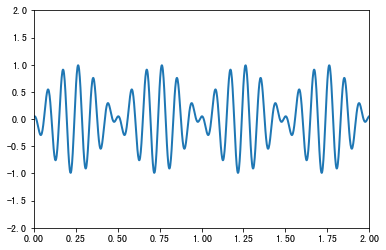

In [9]:
"""
animation.FuncAnimation(fig, func, frames=None, init_func=None, fargs=None, save_count=None, **kwargs)
参数解释：
fig：Falseigure对象
func： 回调函数
frames：帧
init_func：初始函数
fargs：函数参数
"""
fig = plt.figure()
ax = plt.axes(xlim=(0,2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)    # 输入空值，获取line对象

# 定义初始化函数
def init():
    line.set_data([], [])
    return line,             # 注意符号,

def update(i):      # i接收传过来的frames counter
    x = np.linspace(0, 2, 1000)
    y = np.sin(2*np.pi*(x-0.01*i))*np.cos(22*np.pi*(x-0.01*i))
    line.set_data(x, y)
    return line,

# 构造animator对象
animator = animation.FuncAnimation(fig, update, init_func=init, frames=200, blit=True)

# 保存对象
animator.save('./des/animation_demo1.gif', writer='imagemagick')
plt.show()

#### 2. 动态三维图

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)   # 初始化起点
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)  # 步长
        # 下一步的位置
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData   # 返回一个shape为（3,25）的数组,3维坐标25帧


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

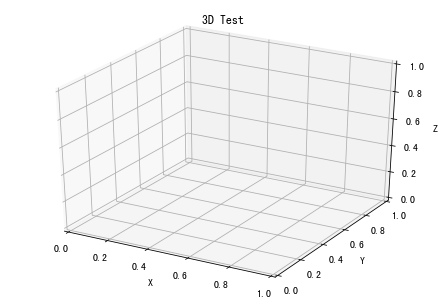

In [13]:
# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines  (长为50的数组，每个元素为shape为3,25的ndarray，最后实际效果就是50条路径)
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data] # 每条路径的起始点

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 50, fargs=(data, lines),
                               interval=50, blit=False)

line_ani.save('./des/animation_demo2.gif', writer='imagemagick')
plt.show()

#### 3. 从不同视角看三维图

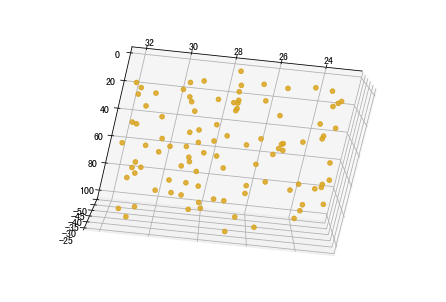

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

def randrange(n, vmin, vmax):
    return (vmax - vmin) * np.random.rand(n) + vmin

n = 100
xx = randrange(n, 23, 32)
yy = randrange(n, 0, 100)
zz = randrange(n, -50, -25)

# Create a figure and a 3D Axes
fig = plt.figure()
ax = Axes3D(fig)

def init():
    ax.scatter(xx, yy, zz, marker='o', s=20, c="goldenrod", alpha=0.6)
    return fig,         

def animate(i):
    ax.view_init(elev=i, azim=i)
    return fig,
# 因为每次更新切换的是视角，所以返回值为fig

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=False)
anim.save('./des/animation_demo3.gif', writer='imagemagick')

plt.show()